In [1]:
!pip install geopandas
!pip install geopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 38.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 23.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
!pip install mapclassify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
#Estas son las librerias que vas a usar
import geopandas as gpd
import matplotlib.pyplot as plt
from mapclassify import classify
import pandas as pd
import numpy as np
import folium
import geopy

1. Crea un mapa para visualizar el archivo:
https://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_110m_admin_1_states_provinces_shp.geojson

<Axes: >

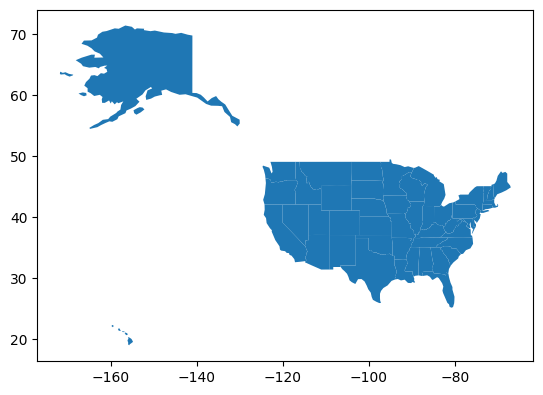

In [8]:
# tu codigo aqui
url = "https://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_110m_admin_1_states_provinces_shp.geojson"
data = gpd.read_file(url)
data.plot()

2. Obtener toda la información sobre el dataframe.

In [9]:
# tu codigo aqui
# no entendí que había que hacer lol
print(data.info())

    scalerank adm1_code  diss_me adm1_cod_1 iso_3166_2  \
0           2  USA-3514     3514   USA-3514      US-MN   
1           2  USA-3515     3515   USA-3515      US-MT   
2           2  USA-3516     3516   USA-3516      US-ND   
3           2  USA-3517     3517   USA-3517      US-HI   
4           2  USA-3518     3518   USA-3518      US-ID   
5           2  USA-3519     3519   USA-3519      US-WA   
6           2  USA-3520     3520   USA-3520      US-AZ   
7           2  USA-3521     3521   USA-3521      US-CA   
8           2  USA-3522     3522   USA-3522      US-CO   
9           2  USA-3523     3523   USA-3523      US-NV   
10          2  USA-3524     3524   USA-3524      US-NM   
11          2  USA-3525     3525   USA-3525      US-OR   
12          2  USA-3526     3526   USA-3526      US-UT   
13          2  USA-3527     3527   USA-3527      US-WY   
14          2  USA-3528     3528   USA-3528      US-AR   
15          2  USA-3529     3529   USA-3529      US-IA   
16          2 

3. Obtener estadísticas descriptivas de las columnas del dataframe

In [21]:
# tu codigo aqui
serie = data.dtypes
columnas = []
# Buscamos todas las columnas que podamos hacer estadística descriptiva
for elem in serie.index: 
  # Si es int o float lo guardamos
  if serie[elem] == "int64" or serie[elem] == "float64":
    columnas.append(elem)

# Para todas las que sean de int o float obtenemos sus correspondientes estadísticas descriptivas
for col in columnas: 
  print(data[col].describe())


count    51.0
mean      2.0
std       0.0
min       2.0
25%       2.0
50%       2.0
75%       2.0
max       2.0
Name: scalerank, dtype: float64
count      51.000000
mean     3538.000000
std        14.866069
min      3513.000000
25%      3525.500000
50%      3538.000000
75%      3550.500000
max      3563.000000
Name: diss_me, dtype: float64
count    51.000000
mean      2.627451
std       2.332044
min       1.000000
25%       1.000000
50%       1.000000
75%       5.000000
max       8.000000
Name: adm0_sr, dtype: float64
count    51.0
mean      2.0
std       0.0
min       2.0
25%       2.0
50%       2.0
75%       2.0
max       2.0
Name: admin0_lab, dtype: float64
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: name_local, dtype: float64
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: note, dtype: float64
count    0.0
mean     NaN
std      NaN
min      NaN
25%      Na

4. ¿Cuántos países están representados en el archivo?

In [30]:
# tu codigo aqui
# supongo que son estados 
print(len(data['iso_3166_2'].unique()))


['US-MN' 'US-MT' 'US-ND' 'US-HI' 'US-ID' 'US-WA' 'US-AZ' 'US-CA' 'US-CO'
 'US-NV' 'US-NM' 'US-OR' 'US-UT' 'US-WY' 'US-AR' 'US-IA' 'US-KS' 'US-MO'
 'US-NE' 'US-OK' 'US-SD' 'US-LA' 'US-TX' 'US-CT' 'US-MA' 'US-NH' 'US-RI'
 'US-VT' 'US-AL' 'US-FL' 'US-GA' 'US-MS' 'US-SC' 'US-IL' 'US-IN' 'US-KY'
 'US-NC' 'US-OH' 'US-TN' 'US-VA' 'US-WI' 'US-WV' 'US-DE' 'US-DC' 'US-MD'
 'US-NJ' 'US-NY' 'US-PA' 'US-ME' 'US-MI' 'US-AK']
51
51


5.  ¿Cuáles son los nombres de los tres países con mayor superficie?

In [35]:
# tu codigo aqui
data['area'] = data.area


<ipython-input-35-bc065c551923>:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  data['area'] = data.area


In [41]:
areas = data['area']
areas = areas.sort_values(ascending = False)
print(areas[:3])

50    281.055732
22     65.647054
1      44.590861
Name: area, dtype: float64


6. Crea un mapa coroplético para visualizar la clasificación anterior

<Axes: >

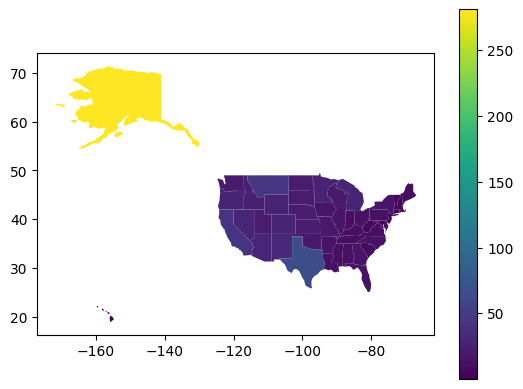

In [42]:
# tu codigo aqui
data.plot(column='area', legend = True)

6. Crea un mapa interactivo para visualizar los estados/provincias con los nombres de las entidades

In [45]:
# tu codigo aqui
data.explore(tooltip='iso_3166_2')